Entender o maior Periodo de Desmatamento no brasil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

Importando o csv

In [ ]:
desmatamento = pd.read_csv('/content/drive/MyDrive/Arquivo Projeto/desmatamento_bioma_estados_pmdbbs_2002-2011.csv',decimal = ',',sep = ';', index_col=0)

Inspecionando o DataFrame (Desmatamento de Biomas por Estados)

In [ ]:
type(desmatamento)

pandas.core.frame.DataFrame

In [ ]:
desmatamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Caatinga to Pantanal
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Estado                                       212 non-null    object 
 1   Número de registros                          212 non-null    int64  
 2   Período                                      212 non-null    object 
 3   Área Desmatada recalculada pela Conica (ha)  212 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.3+ KB


In [ ]:
desmatamento.shape

(212, 4)

In [ ]:
desmatamento.columns

Index(['Estado', 'Número de registros', 'Período',
       'Área Desmatada recalculada pela Conica (ha)'],
      dtype='object')

In [ ]:
desmatamento.head()

,Estado,Número de registros,Período,Área Desmatada recalculada pela Conica (ha)
Bioma,,,,
Caatinga,Alagoas,1,<=2002,1.032251e+06
Caatinga,Alagoas,1,2002-2008,3.509487e+04
Caatinga,Alagoas,1,<=2008,7.068240e+03
Caatinga,Alagoas,1,2008-2009,2.342149e+03
Caatinga,Alagoas,1,<=2009,2.877131e+03


In [ ]:
desmatamento.tail()

,Estado,Número de registros,Período,Área Desmatada recalculada pela Conica (ha)
Bioma,,,,
Pantanal,Mato Grosso,1,2008-2009,8921.559148
Pantanal,Mato Grosso do Sul,1,<=2002,871944.555800
Pantanal,Mato Grosso do Sul,1,2002-2008,278436.995600
Pantanal,Mato Grosso do Sul,1,<=2009,25176.870760
Pantanal,Mato Grosso do Sul,1,2008-2009,9925.748323


In [ ]:
desmatamento.sort_index()

,Estado,Número de registros,Período,Área Desmatada recalculada pela Conica (ha)
Bioma,,,,
Caatinga,Alagoas,1,<=2002,1.032251e+06
Caatinga,Alagoas,1,2002-2008,3.509487e+04
Caatinga,Alagoas,1,<=2008,7.068240e+03
Caatinga,Alagoas,1,2008-2009,2.342149e+03
Caatinga,Alagoas,1,<=2009,2.877131e+03
...,...,...,...,...
Pantanal,Mato Grosso,1,2008-2009,8.921559e+03
Pantanal,Mato Grosso do Sul,1,<=2002,8.719446e+05
Pantanal,Mato Grosso do Sul,1,2002-2008,2.784370e+05


Manipulando o DataFrame

####################################

Separando por Area Desmatada

In [ ]:
desmatamento.columns

Index(['Estado', 'Número de registros', 'Período',
       'Área Desmatada recalculada pela Conica (ha)'],
      dtype='object')

In [ ]:
area_desmatada = desmatamento['Área Desmatada recalculada pela Conica (ha)']


In [ ]:
area_desmatada.head().sort_index()

Bioma
Caatinga    1.032251e+06
Caatinga    3.509487e+04
Caatinga    7.068240e+03
Caatinga    2.342149e+03
Caatinga    2.877131e+03
Name: Área Desmatada recalculada pela Conica (ha), dtype: float64

Separando por Periodo

In [ ]:
desmatamento_periodo = desmatamento['Período']

In [ ]:
desmatamento_periodo.head().sort_index()

Bioma
Caatinga       <=2002
Caatinga    2002-2008
Caatinga       <=2008
Caatinga    2008-2009
Caatinga       <=2009
Name: Período, dtype: object

####################################################

Usando Groupby

bioma

In [ ]:
bioma_groupby = desmatamento.groupby(by='Bioma').head()

In [ ]:
bioma_groupby.head()

,Estado,Número de registros,Período,Área Desmatada recalculada pela Conica (ha)
Bioma,,,,
Caatinga,Alagoas,1,<=2002,1.032251e+06
Caatinga,Alagoas,1,2002-2008,3.509487e+04
Caatinga,Alagoas,1,<=2008,7.068240e+03
Caatinga,Alagoas,1,2008-2009,2.342149e+03
Caatinga,Alagoas,1,<=2009,2.877131e+03


Estado

In [ ]:
estado_groupby = desmatamento.groupby(by='Estado').head()

In [ ]:
estado_groupby.head()

,Estado,Número de registros,Período,Área Desmatada recalculada pela Conica (ha)
Bioma,,,,
Caatinga,Alagoas,1,<=2002,1.032251e+06
Caatinga,Alagoas,1,2002-2008,3.509487e+04
Caatinga,Alagoas,1,<=2008,7.068240e+03
Caatinga,Alagoas,1,2008-2009,2.342149e+03
Caatinga,Alagoas,1,<=2009,2.877131e+03


In [ ]:
estado_groupby.min()

Estado                                           Alagoas
Número de registros                                    1
Período                                        2002-2008
Área Desmatada recalculada pela Conica (ha)      5.09391
dtype: object

In [ ]:
estado_groupby.max()

Estado                                           Tocantins
Número de registros                                      1
Período                                             <=2009
Área Desmatada recalculada pela Conica (ha)    2.02875e+07
dtype: object

Area Desmatamento

In [ ]:
areadesm_groupby_max = desmatamento.groupby(by='Área Desmatada recalculada pela Conica (ha)').head().max()

In [ ]:
areadesm_groupby_max.head()

Estado                                           Tocantins
Número de registros                                      1
Período                                             <=2010
Área Desmatada recalculada pela Conica (ha)    2.02875e+07
dtype: object

In [ ]:
areadesm_groupby_min = desmatamento.groupby(by='Área Desmatada recalculada pela Conica (ha)').head().min()

In [ ]:
areadesm_groupby_min.head()

Estado                                           Alagoas
Número de registros                                    1
Período                                        2002-2008
Área Desmatada recalculada pela Conica (ha)      5.09391
dtype: object

In [ ]:
bioma_groupby_max = desmatamento.groupby(by='Bioma').head().max()

In [ ]:
bioma_groupby_max.head()

Estado                                         Rio Grande do Sul
Número de registros                                            1
Período                                                   <=2009
Área Desmatada recalculada pela Conica (ha)          9.43576e+06
dtype: object

In [ ]:
bioma_groupby_min = desmatamento.groupby(by='Bioma').head().min()

In [ ]:
bioma_groupby_min.head()

Estado                                           Alagoas
Número de registros                                    1
Período                                        2002-2008
Área Desmatada recalculada pela Conica (ha)      428.127
dtype: object

Insights de Dados

maior desmatamento por estado

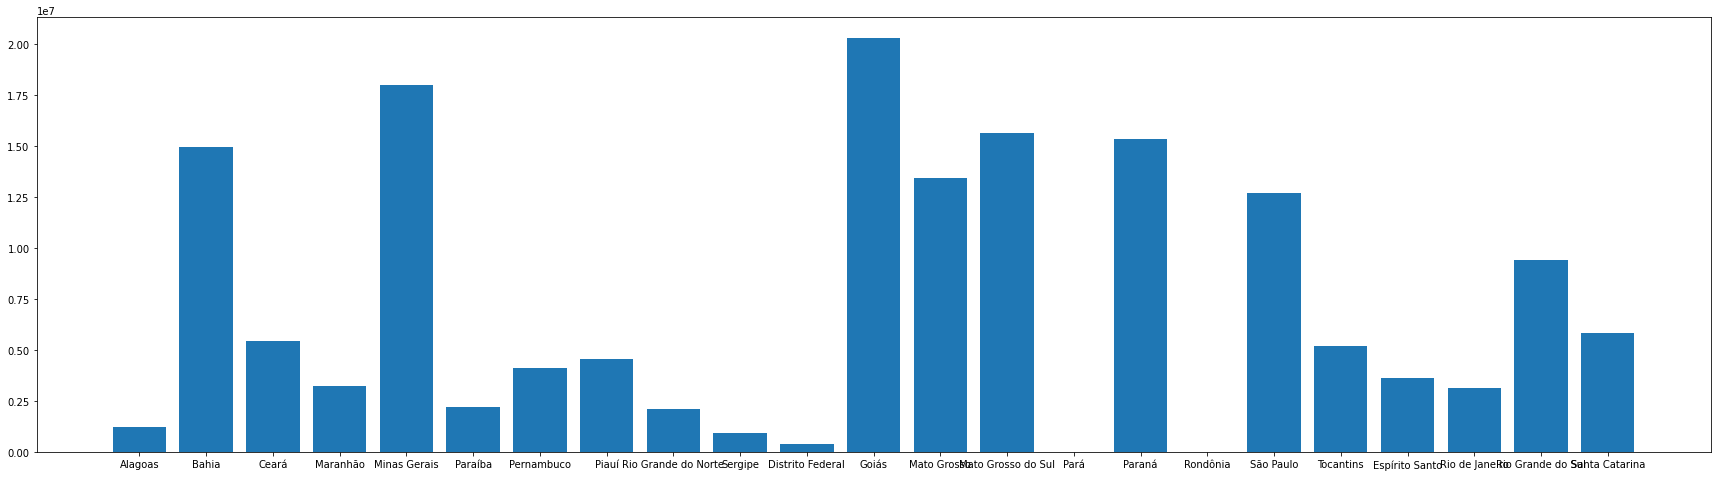

In [ ]:
area_grouped = desmatamento['Estado']
estado_grouped = desmatamento['Área Desmatada recalculada pela Conica (ha)']
 
plt.bar(area_grouped,estado_grouped)
plt.rcParams["figure.figsize"] = [30, 8]
 
 
plt.show()

Conjuntos de Treino e Testes

In [ ]:
area_desmatada = area_desmatada.values.reshape(-1, 1)
desmatamento_periodo = desmatamento.values.reshape((-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
x = area_desmatada
y = area_desmatada
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

Treinando estimador


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Testando estimador

In [ ]:
# Regressor
y_pred = clf.predict(x_test)
sklearn.metrics.r2_score(y_test, y_pred)


In [ ]:
clf.score(x_test, y_test)